In [27]:
import pandas as pd
import numpy as np
import nibabel as nib

from os.path import join, exists
from scipy.stats import ttest_ind

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_theme(style="white")

import matplotlib.pyplot as plt


In [28]:
df_patients = pd.read_csv('Clasificados.csv')
df_atlas = pd.read_csv('Harvard_Oxford.csv')

atlas_img = nib.load('cortex_Harvard_Oxford_orig_atlas.nii.gz')
atlas_data = atlas_img.get_fdata()

dir_pets = r'D:\MIA\Autopsia'

for index_patient, row_patient in df_patients.iterrows():
    
    subject = row_patient['SUBJECT_ID']
    id = row_patient['FDG_ID']
    
    dir_name = subject + '_I' + str(id)
    pet_ = join(dir_pets,dir_name, 'swfdg_normhist.hdr')
    
    pet_img = nib.load(pet_)
    pet_data = pet_img.get_fdata()
    
    for index_atlas, row_atlas in df_atlas.iterrows():
        
        roi_name = row_atlas['ROI_NAME']
        roi_num = row_atlas['ROI_NUM']
        
        indx_roi = np.where(atlas_data == roi_num)
        roi_value = np.mean(pet_data[indx_roi])

        df_patients.loc[index_patient, roi_name] = roi_value

df_patients

,Unnamed: 0,SUBJECT_ID,ORIG_GROUP,LAST_DIAGNOSIS,FDG_ID,FDG_AGE,AGE_DEATH,ALZHEIMER PATHOLOGY,LEWY PATHOLOGY,Group,...,Planum_Polare,Heschl's_Gyrus,Planum_Temporale,Supracalcarine_Cortex,Occipital_Pole,Thalamus,Striatum,Brainstem,Hippocampus,Amygdala
0,0,003_S_4892,AD,AD,334485,75.3,76,3,0,pure-AD,...,1.206530,1.423608,1.330791,1.867905,1.482770,1.121088,1.175532,0.895746,1.020664,0.982098
1,1,005_S_0448,MCI,AD,226091,90.6,93,1,2,pure-Lewy,...,1.208496,1.565999,1.513874,1.582445,1.271314,0.973781,1.330373,1.010803,1.072394,1.120139
2,4,011_S_0008,CN,MCI,26885,85.6,95,1,3,pure-Lewy,...,1.280594,1.537939,1.470419,1.659314,1.404669,1.211122,1.256367,0.925326,1.077617,1.050791
3,6,011_S_0053,AD,AD,83975,82.2,86,1,3,pure-Lewy,...,1.249175,1.501377,1.257903,1.496108,1.298316,1.013251,1.254987,1.012383,1.136809,1.129274
4,9,011_S_0362,MCI,AD,141405,73.6,75,3,0,pure-AD,...,1.347796,1.598650,1.564037,1.648271,1.529169,1.170500,1.245975,0.973428,1.024073,1.029125
5,10,011_S_0861,MCI,AD,158134,90.3,93,3,0,pure-AD,...,1.119537,1.389431,1.373873,1.632121,1.449426,0.808612,0.984717,0.910093,0.997777,1.001854
6,13,011_S_4827,AD,AD,906469,76.2,78,3,0,pure-AD,...,1.014870,1.398580,1.412917,1.800605,1.590368,0.996838,1.182004,0.843337,0.875962,0.893632
7,14,014_S_0563,MCI,AD,196278,85.1,93,1,2,pure-Lewy,...,1.136658,1.298665,1.256327,1.542219,1.514056,0.933598,1.197445,0.984119,0.902683,1.037154
8,16,014_S_4058,LMCI,AD,246832,84.8,90,3,0,pure-AD,...,1.190423,1.468963,1.465101,1.797530,1.679486,1.116555,1.134851,0.967362,1.017832,1.020538
9,18,014_S_4615,AD,AD,301226,86.7,92,3,0,pure-AD,...,1.046732,1.202993,1.236580,1.623819,1.400050,0.965332,1.081781,0.968254,0.879256,0.971064


In [29]:
df_pureAD = df_patients.loc[df_patients['Group']=='pure-AD']
df_pureLB = df_patients.loc[df_patients['Group']=='pure-Lewy']

In [30]:
variables = df_pureAD.columns[10:]

for var in variables:
    ad_vals = df_pureAD[var]
    lb_vals = df_pureLB[var]
    t_stat, p_val = ttest_ind(ad_vals, lb_vals)
    if p_val < 0.005:
        print({"Variable": var, "T-Statistic": t_stat, "P-Value": p_val})

    else:
        df_patients = df_patients.drop(columns=var)

df_patients

{'Variable': 'Inferior_Temporal_Gyrus_anterior_division', 'T-Statistic': -3.6480136362449818, 'P-Value': 0.0008766686428360999}
{'Variable': 'Intracalcarine_Cortex', 'T-Statistic': 3.422860754834636, 'P-Value': 0.0016316623398194953}
{'Variable': 'Supracalcarine_Cortex', 'T-Statistic': 3.014380728373634, 'P-Value': 0.00484164283053538}


,Unnamed: 0,SUBJECT_ID,ORIG_GROUP,LAST_DIAGNOSIS,FDG_ID,FDG_AGE,AGE_DEATH,ALZHEIMER PATHOLOGY,LEWY PATHOLOGY,Group,Inferior_Temporal_Gyrus_anterior_division,Intracalcarine_Cortex,Supracalcarine_Cortex
0,0,003_S_4892,AD,AD,334485,75.3,76,3,0,pure-AD,1.082464,1.806612,1.867905
1,1,005_S_0448,MCI,AD,226091,90.6,93,1,2,pure-Lewy,1.251840,1.562329,1.582445
2,4,011_S_0008,CN,MCI,26885,85.6,95,1,3,pure-Lewy,1.169544,1.659618,1.659314
3,6,011_S_0053,AD,AD,83975,82.2,86,1,3,pure-Lewy,1.314990,1.516506,1.496108
4,9,011_S_0362,MCI,AD,141405,73.6,75,3,0,pure-AD,1.059917,1.709761,1.648271
5,10,011_S_0861,MCI,AD,158134,90.3,93,3,0,pure-AD,1.135093,1.804450,1.632121
6,13,011_S_4827,AD,AD,906469,76.2,78,3,0,pure-AD,1.075888,1.817859,1.800605
7,14,014_S_0563,MCI,AD,196278,85.1,93,1,2,pure-Lewy,1.185621,1.575078,1.542219
8,16,014_S_4058,LMCI,AD,246832,84.8,90,3,0,pure-AD,1.133862,1.869121,1.797530
9,18,014_S_4615,AD,AD,301226,86.7,92,3,0,pure-AD,1.135471,1.708735,1.623819


C:\Users\jesus\AppData\Local\Temp\ipykernel_34820\2035295045.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, j)
C:\Users\jesus\Work\software\anaconda\envs\Base_Imaging\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jesus\Work\software\anaconda\envs\Base_Imaging\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jesus\Work\software\anaconda\envs\Base_Imaging\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

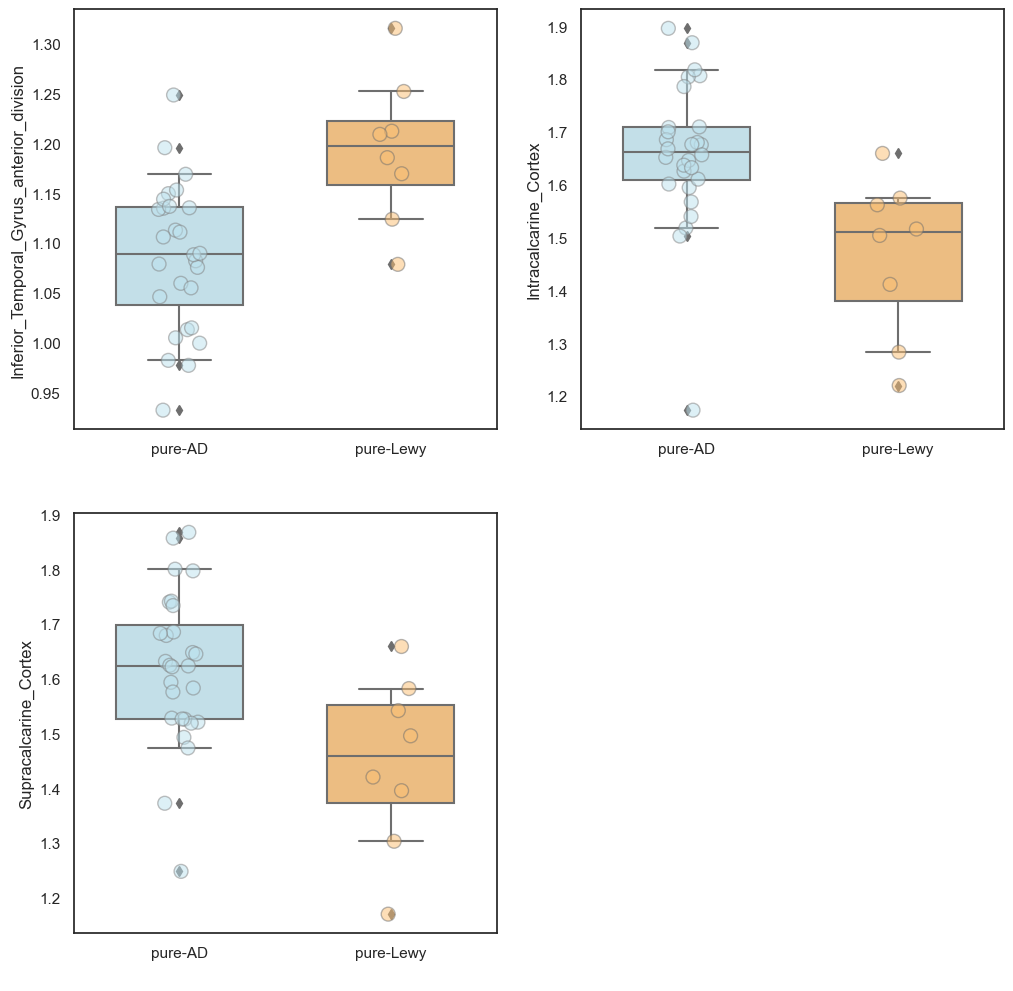

In [34]:
f, ax = plt.subplots(figsize=(12, 12))
j=1

roi_list = ['Inferior_Temporal_Gyrus_anterior_division','Intracalcarine_Cortex','Supracalcarine_Cortex']

for i in roi_list:
    var_y = i
    plt.subplot(2, 2, j)

    g = sns.boxplot(x="Group", y=var_y, data=df_patients, whis=[5, 95], width=.6, palette="RdYlBu_r")
    sns.stripplot(x="Group", y=var_y, data=df_patients, size=10, palette="RdYlBu_r", linewidth=1,alpha=0.5)

    g.set_xlabel(" ")
    g.set_ylabel(i)

    j = j+1

In [32]:
df_patients.to_csv('Features.csv')